# Task 1

A real world machine learning problem I would lile to solve using Logistic Regression is predicting if a hotel booking will be cancelled or not. This is a helpful issue to solve as it gives hotels an upperhand to know if there is a high possibility a guest will cancel their reservation to save money and resources. This is a binary classification problem with two options: will cancel or will not cancel. Logistic regression is the best choice for this as it is most suitable for such binary classification problems. Logistic regression also provides a probability of the outcome, which is a useful metric to have as it is easy to interpret and can be used by businesses. It is also a good baseline model to then improve on with more complex models.

# Task 2

This is the link to the dataset I chose: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?resource=download.

I downloaded the dataset and loaded it locally to this notebook.

# EDA

In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score, log_loss

In [5]:
#Loading the dataset
path = 'HW1/hotel_bookings.csv'
data = pd.read_csv(path)

In [6]:
#Viewing the first few rows of the dataset to see all the features of the dataset
data.head()

#Observation: dataset has different data types based on the column

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
#Getting basic information about the dataset
#Shows the number of rows and columns
data.shape

(119390, 32)

In [8]:
#Number of missing values for each column
data.isnull().sum()

#Observation: columns 'country', 'agent', and 'company' have a significant number of missing values
#Based on the data visualization, I can decide if it is necessary to drop these columns

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
#Data type of each column
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# Data Visualization

I created graphs to see the distribution of some of the relevant columns to the problem of hotel concellation. 

Text(0.5, 1.0, 'Lead Time')

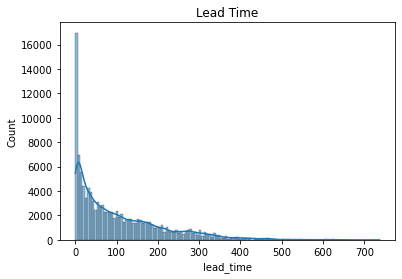

In [10]:
sns.histplot(data['lead_time'], kde=True).set_title('Lead Time')

Lead time is the time between when the hotel was booked and the arrival time. For this variable, most values are right skewed. This can be interpreted as the time between when the hotel was booked and the arrival time is most commonly low. This means most bookings are made closer to the arrival time. 

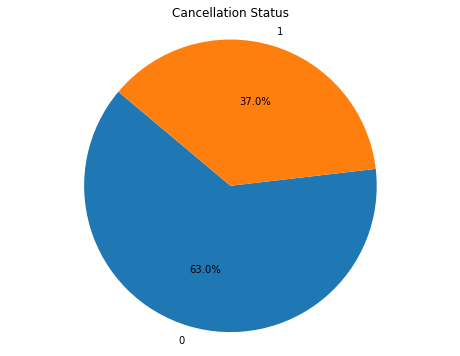

In [11]:
count = data['is_canceled'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
plt.title('Cancellation Status')
plt.axis('equal') 
plt.show()

The piechart shows the percentage of bookings cancelled or not. 1 indicates it was cancelled and 0 indicates it was not. So, a majority of the bookings were not cancelled.

Text(0.5, 1.0, 'Average Daily Rate (ADR)')

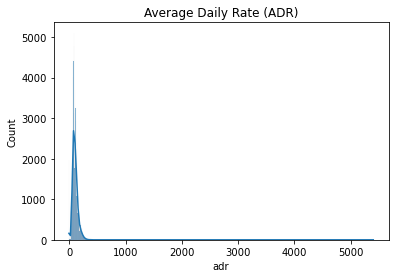

In [12]:
sns.histplot(data['adr'], kde=True).set_title('Average Daily Rate (ADR)')

ADR is the average daily rate of the hotel. This variable is also right skewed, meaning the average daily rate is typically low for the hotels.

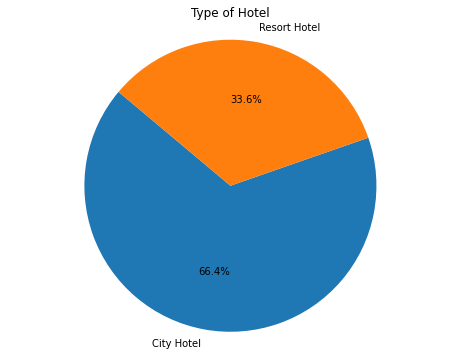

In [13]:
count = data['hotel'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
plt.title('Type of Hotel')
plt.axis('equal') 
plt.show()

This pie chart shows the distribution of the type of hotel booked. A majority of the hotels booked are city hotels.

<AxesSubplot:>

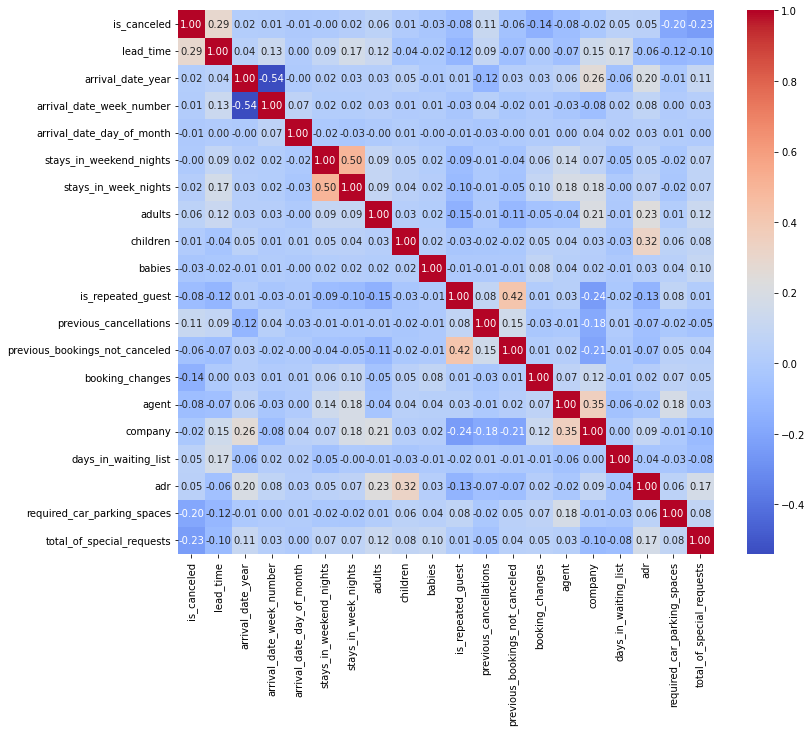

In [14]:
plt.figure(figsize=(12, 10))

sns.heatmap(data.corr(), annot = True, fmt=".2f", cmap='coolwarm')

The heat map shows the correlation between the variables. The 1.0 red diagonal values indicate the correlation with the variable itself. Interesting observations can be made with this map that give insight into what type of relationships can be predicted with this dataset. For instance, there is a slightly higher correlation between is_canceled and lead_time, indicating that these variables may be impacting one another.

# Data Cleaning

For the columns 'country', 'agent', and 'company' that had a significant amount of missing values:

The 'country' column can be dropped as it has mostly missing values.
The 'agent' and 'company' column can be dropped as well as they do not have a significant correlation with the 'is_canceled' feature, making it unimportant for what I am trying to predict.

In [15]:
data=data.drop(['country','agent','company'],axis=1)

In [16]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

At this point, the 'children' column is the only one with missing values and we can just drop these values.

In [17]:
data=data.dropna()

In [18]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

# Data Preprocessing

In [19]:
#Using the correlation with the is_canceled feature to identify useful features for the model
correlation = data.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.293177
total_of_special_requests         0.234706
required_car_parking_spaces       0.195492
booking_changes                   0.144371
previous_cancellations            0.110140
is_repeated_guest                 0.084788
adults                            0.059990
previous_bookings_not_canceled    0.057355
days_in_waiting_list              0.054193
adr                               0.047622
babies                            0.032488
stays_in_week_nights              0.024771
arrival_date_year                 0.016732
arrival_date_week_number          0.008132
arrival_date_day_of_month         0.006084
children                          0.005048
stays_in_weekend_nights           0.001783
Name: is_canceled, dtype: float64

In [20]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [21]:
#Dropping the unnecessary columns based on correlation and logical reasoning
drop_columns = ['stays_in_weekend_nights', 'reservation_status', 'reservation_status_date']

data.drop(drop_columns, axis = 1, inplace = True)

In [22]:
#Finding the cateogrical features to encode them
categorical = [col for col in data.columns if data[col].dtype == 'O']
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [23]:
categorical_data = data[categorical]
#Printing unique values of each categorical column
for col in categorical_data.columns:
    print(f"{col}: {categorical_data[col].unique()}")

hotel: ['Resort Hotel' 'City Hotel']
arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
market_segment: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation']
distribution_channel: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
reserved_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
assigned_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
deposit_type: ['No Deposit' 'Refundable' 'Non Refund']
customer_type: ['Transient' 'Contract' 'Transient-Party' 'Group']


In [24]:
#Encoding the categorical variables
categorical_data['hotel'] = categorical_data['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

categorical_data['arrival_date_month'] = categorical_data['arrival_date_month'].map({'July': 6, 'August': 7, 'September': 8, 'October':9, 'November': 10, 'December': 11, 'January': 0,
 'February': 1, 'March': 2, 'April': 3, 'May': 4, 'June': 5})

categorical_data['meal'] = categorical_data['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

categorical_data['market_segment'] = categorical_data['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

categorical_data['distribution_channel'] = categorical_data['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3, 'GDS': 4})

categorical_data['reserved_room_type'] = categorical_data['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6, 'L': 7, 'B': 8})

categorical_data['assigned_room_type'] = categorical_data['assigned_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'I': 6, 'B': 7, 'H': 8, 'P': 9, 'L':10, 'K':11})

categorical_data['deposit_type'] = categorical_data['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

categorical_data['customer_type'] = categorical_data['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

/var/folders/6h/jvj1v_bx7kldrcbf4gl1ml7m0000gn/T/ipykernel_82975/3276513362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['hotel'] = categorical_data['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
/var/folders/6h/jvj1v_bx7kldrcbf4gl1ml7m0000gn/T/ipykernel_82975/3276513362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['arrival_date_month'] = categorical_data['arrival_date_month'].map({'July': 6, 'August': 7, 'September': 8, 'October':9, 'November': 10, 'Dec

In [25]:
categorical_data.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,0,6,0,0,0,0.0,0,0,0
1,0,6,0,0,0,0.0,0,0,0
2,0,6,0,0,0,1.0,0,0,0
3,0,6,0,1,1,1.0,1,0,0
4,0,6,0,2,2,1.0,1,0,0


In [26]:
#Finding the numerical data features
numerical_data = data.drop(columns = categorical, axis = 1)
numerical_data.drop('is_canceled', axis = 1, inplace = True)
numerical_data

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,2,0.0,0,0,0,0,3,0,0.00,0,0
1,737,2015,27,1,0,2,0.0,0,0,0,0,4,0,0.00,0,0
2,7,2015,27,1,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,13,2015,27,1,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,14,2015,27,1,2,2,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,5,2,0.0,0,0,0,0,0,0,96.14,0,0
119386,102,2017,35,31,5,3,0.0,0,0,0,0,0,0,225.43,0,2
119387,34,2017,35,31,5,2,0.0,0,0,0,0,0,0,157.71,0,4
119388,109,2017,35,31,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [27]:
numerical_data.var()

lead_time                         11419.761970
arrival_date_year                     0.500494
arrival_date_week_number            185.105119
arrival_date_day_of_month            77.102158
stays_in_week_nights                  3.641567
adults                                0.335543
children                              0.158851
babies                                0.009494
is_repeated_guest                     0.030895
previous_cancellations                0.712928
previous_bookings_not_canceled        2.242392
booking_changes                       0.425515
days_in_waiting_list                309.584395
adr                                2553.752234
required_car_parking_spaces           0.060170
total_of_special_requests             0.628529
dtype: float64

In [28]:
#Normalizing the numerical data values
numerical_data['lead_time'] = np.log(numerical_data['lead_time'] + 1)
numerical_data['arrival_date_year'] = np.log(numerical_data['arrival_date_year'] + 1)
numerical_data['arrival_date_week_number'] = np.log(numerical_data['arrival_date_week_number'] + 1)
numerical_data['arrival_date_day_of_month'] = np.log(numerical_data['arrival_date_day_of_month'] + 1)
numerical_data['stays_in_week_nights'] = np.log(numerical_data['stays_in_week_nights'] + 1)
numerical_data['adults'] = np.log(numerical_data['adults'] + 1)
numerical_data['children'] = np.log(numerical_data['children'] + 1)
numerical_data['babies'] = np.log(numerical_data['babies'] + 1)
numerical_data['is_repeated_guest'] = np.log(numerical_data['is_repeated_guest'] + 1)
numerical_data['previous_cancellations'] = np.log(numerical_data['previous_cancellations'] + 1)
numerical_data['previous_bookings_not_canceled'] = np.log(numerical_data['previous_bookings_not_canceled'] + 1)
numerical_data['booking_changes'] = np.log(numerical_data['booking_changes'] + 1)
numerical_data['days_in_waiting_list'] = np.log(numerical_data['days_in_waiting_list'] + 1)
numerical_data['adr'] = np.log(numerical_data['adr'] + 1)
numerical_data['required_car_parking_spaces'] = np.log(numerical_data['required_car_parking_spaces'] + 1)
numerical_data['total_of_special_requests'] = np.log(numerical_data['total_of_special_requests'] + 1)

/Users/arthi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
numerical_data.var()

lead_time                         2.591255e+00
arrival_date_year                 1.230142e-07
arrival_date_week_number          4.410499e-01
arrival_date_day_of_month         5.062597e-01
stays_in_week_nights              2.505266e-01
adults                            3.637708e-02
children                          5.381960e-02
babies                            3.836989e-03
is_repeated_guest                 1.484364e-02
previous_cancellations            4.027672e-02
previous_bookings_not_canceled    6.884954e-02
booking_changes                   1.051405e-01
days_in_waiting_list              5.039830e-01
adr                               5.402896e-01
required_car_parking_spaces       2.825861e-02
total_of_special_requests         1.934577e-01
dtype: float64

*NOTE*
My implementation was not working with the entire dataset of over 100,000 rows. I was getting 'Nan' values for the weights. I did a lot of experimenting and the best solution was to take a random sample of the dataset of 900 rows. Any more rows was not compatible either.

In [30]:
#Creating anew data frame with the encoded cateogrical data and the normalized numerical data
new_data = pd.concat([categorical_data, numerical_data], axis = 1)
new_data['is_canceled'] = data['is_canceled']
#Taking the sample data
sample_data = new_data.sample(n=900)

In [31]:
#Initializing X and y
X = sample_data.drop('is_canceled', axis=1).values
y = sample_data['is_canceled'].values

In [32]:
X.shape, y.shape

((900, 25), (900,))

In [33]:
#Adding a column of ones to the features for the intercept
X = np.hstack([np.ones((X.shape[0], 1)), X])
#Train 80% and Test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((720, 26), (180, 26), (720,), (180,))

# Task 3

For my cost function, I am using the binary-cross entropy function. 

-$\frac{1}{N}$ $\sum_{i=1}^{N}$ \[ $y_{i}$ $\times$ $\log$(p($y_{i}$)) + (1 - $y_{i}$) $\times$ $\log$(1 - p($y_{i}$)\]

The derivative of this function is

-$\frac{y_{i}}{p(y_{i})}$ +  $\frac{1 - y_{i}}{1 - p(y_{i})}$

# Implementation

In [35]:
#Logistic Sigmoid function
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

In [36]:
#Cost function
def cost_function(X, y, weights):
    #num of training examples
    m = len(y)
    #predicted probabilities
    p = sigmoid_function(np.dot(X, weights))
    #value to prevent log(0) from happening
    epsilon = 1e-5
    #using the cost formula defined above
    cost = -1/m * np.sum(y * np.log(p + epsilon) + (1 - y) * np.log(1 - p + epsilon))
    return cost

I am implementing Batch Gradient Descent and Stochastic Gradient Descent.

In [37]:
#Batch Gradient Descent Function
def batch_gradient_descent(X, y, learning_rate, epochs):
    #num of samples, num of features
    m, n = X.shape
    #initializing weights
    weights = np.zeros(n)
    #storing cost at each epoch
    cost_history = np.zeros(epochs)

    for i in range(epochs):
        predictions = sigmoid_function(np.dot(X, weights))
        #updating weights based on the gradient of cost funciton
        weights -= learning_rate * (1/m) * np.dot(X.T, (predictions - y))
        #update the cost
        cost_history[i] = cost_function(X, y, weights)

    return weights

In [38]:
#Stochastic Gradient Descent Function
def stochastic_gradient_descent(X, y, learning_rate, epochs):
    #num of samples, num of features
    m, n = X.shape
    #initializing weights
    weights = np.zeros(n)
    #storing cost at each epoch
    cost_history = np.zeros(epochs)

    for i in range(epochs):
        for j in range(m):
            #randomly picking an index
            index = np.random.randint(m)
            #selecting the training value at that index
            Xi = X[index, :].reshape(1, -1)
            #selecting the label
            yi = y[index].reshape(-1)
            predictions = sigmoid_function(np.dot(Xi, weights))
            #updating weights based on the chosen value
            weights -= learning_rate * np.dot(Xi.T, (predictions - yi))
        #update the cost
        cost_history[i] = cost_function(X, y, weights)

    return weights

In [39]:
#Parameters for gradient descent
learning_rate = 0.01
epochs = 1000

#Implementing Batch Gradient Descent
weights_bgd = batch_gradient_descent(X_train, y_train, learning_rate, epochs)

#Implementing Stochastic Gradient Descent
weights_sgd = stochastic_gradient_descent(X_train, y_train, learning_rate, epochs)

weights_bgd, weights_sgd

(array([-0.04971985,  0.11349126,  0.02832415, -0.01494235,  0.0902582 ,
         0.22029711,  0.16891002, -0.10645901,  0.73880954, -0.4245667 ,
         0.40152071, -0.37836358, -0.08371135, -0.0396352 , -0.02407896,
        -0.05271081,  0.05925137, -0.01467929,  0.00133628,  0.11576668,
        -0.01756508, -0.164277  ,  0.00569672,  0.07203714, -0.1091729 ,
        -0.2810947 ]),
 array([-0.10537569,  0.2285523 ,  0.02697294,  0.03030647, -0.34359253,
         1.45446862,  0.67044052, -0.44415889,  3.0351411 , -0.59091484,
         0.66559796, -0.81735564, -0.22425809,  0.37792014, -0.22356471,
        -1.24551356,  0.48929444, -2.35794962,  0.35861091,  9.52480536,
        -1.52109528, -0.93050283, -0.27299431,  0.74866246, -7.47247998,
        -1.38539207]))

# Task 4

The two optimization functions I chose are momentum and Adam.

# Implementation

In [40]:
#Momentum Gradient Descent
def momentum_gradient_descent(X, y, learning_rate, epochs, beta = 0.9):
    #num of samples, num of features
    m, n = X.shape
    #initializing weights and velocity to zeros
    weights = np.zeros(n)
    velocity = np.zeros(n)
    cost_history = np.zeros(epochs)

    for i in range(epochs):
        predictions = sigmoid_function(np.dot(X, weights))
        gradient = (1/m) * np.dot(X.T, (predictions - y))
        #updating veloicty value
        velocity = (1 - beta) * gradient + beta * velocity
        #updating weights and cost
        weights -= learning_rate * velocity
        cost_history[i] = cost_function(X, y, weights)

    return weights

In [41]:
#Adam Gradient Descent
def adam_gradient_descent(X, y, learning_rate, epochs, beta1 = 0.9, beta2 = 0.999):
    #num of samples, num of features
    m, n = X.shape
    #initializing weights and velocity to zeros
    weights = np.zeros(n)
    #initializing both vectors
    v1 = np.zeros(n)
    v2 = np.zeros(n)
    cost_history = np.zeros(epochs)
    epsilon = 1e-8

    for i in range(epochs):
        predictions = sigmoid_function(np.dot(X, weights))
        gradient = (1/m) * np.dot(X.T, (predictions - y))
        #updated first moment estimate
        v1 = beta1 * v1 + (1 - beta1) * gradient
        #updated second moment estimate
        v2 = beta2 * v2 + (1 - beta2) * (gradient ** 2)
        #bias-corrected first moment estimate
        v1_hat = v1 / (1 - beta1 ** (i + 1))
        #bias-corrected second moment estimate
        v2_hat = v2 / (1 - beta2 ** (i + 1))
        #updating weights and cost
        weights -= learning_rate * v1_hat / (np.sqrt(v2_hat) + epsilon)
        cost_history[i] = cost_function(X, y, weights)

    return weights

In [43]:
#Parameters
learning_rate = 0.01
epochs = 1000

#Implementing momentum
weights_momentum = momentum_gradient_descent(X_train, y_train, learning_rate, epochs, beta = 0.9)

#Implementing Adam
weights_adam = adam_gradient_descent(X_train, y_train, learning_rate, epochs, beta1=0.9, beta2=0.999)

weights_momentum, weights_adam

(array([-0.04977141,  0.11329868,  0.02841415, -0.01502164,  0.09046711,
         0.21967984,  0.16895918, -0.10607282,  0.74066662, -0.42604083,
         0.40268672, -0.37875563, -0.08381828, -0.04036765, -0.0238603 ,
        -0.05239533,  0.05899501, -0.01458817,  0.00112326,  0.11502268,
        -0.01782774, -0.1637825 ,  0.00617923,  0.07181989, -0.10841071,
        -0.27983738]),
 array([-0.62897204,  0.05959388,  0.09298815, -0.011839  , -0.26601356,
         1.16123954,  0.50305708, -0.35610215,  1.78921007, -0.5279943 ,
         0.50798753, -0.62930774, -0.27709588,  0.22585548, -0.15741458,
        -0.97361888,  0.38423422, -3.62603196,  0.76903431,  4.94485631,
        -0.79611097, -0.73045276, -0.14480564,  0.54700103, -4.52505535,
        -1.28081815]))

# Evaluation Metrics

I am using the accuracy and log loss metric to evaluate the models. Accuracy is straight forward providing the ratio of correct predictions. Log loss is used to measure the performance of a classification model where the probability value is between 0 and 1.

In [44]:
#Calculating all the probabilities using the sigmoid function and the X_test values and corresponding weights
probabilities_bgd = sigmoid_function(np.dot(X_test, weights_bgd))
probabilities_sgd = sigmoid_function(np.dot(X_test, weights_sgd))
probabilities_momentum = sigmoid_function(np.dot(X_test, weights_momentum))
probabilities_adam = sigmoid_function(np.dot(X_test, weights_adam))

#Converting probabilities to 0 or 1
predictions_bgd = np.where(probabilities_bgd >= 0.5, 1, 0)
predictions_sgd = np.where(probabilities_sgd >= 0.5, 1, 0)
predictions_momentum = np.where(probabilities_momentum >= 0.5, 1, 0)
predictions_adam = np.where(probabilities_adam >= 0.5, 1, 0)

#Calculating accuracy and log loss metric
accuracy_bgd = accuracy_score(y_test, predictions_bgd)
logloss_bgd = log_loss(y_test, probabilities_bgd) 

accuracy_sgd = accuracy_score(y_test, predictions_sgd)
logloss_sgd = log_loss(y_test, probabilities_sgd) 

accuracy_momentum = accuracy_score(y_test, predictions_momentum)
logloss_momentum = log_loss(y_test, probabilities_momentum) 

accuracy_adam = accuracy_score(y_test, predictions_adam)
logloss_adam = log_loss(y_test, probabilities_adam) 

print(f"Batch Gradient Descent Accuracy: {accuracy_bgd}")
print(f"Batch Gradient Descent Log Loss: {logloss_bgd}")

print(f"Stochastic Gradient Descent Accuracy: {accuracy_sgd}")
print(f"Stochastic Gradient Descent Log Loss: {logloss_sgd}")

print(f"Momentum Optimization Accuracy: {accuracy_momentum}")
print(f"Momentum Optimization Log Loss: {logloss_momentum}")

print(f"Adam Optimization Accuracy: {accuracy_adam}")
print(f"Adam Optimization Log Loss: {logloss_adam}")

Batch Gradient Descent Accuracy: 0.7722222222222223
Batch Gradient Descent Log Loss: 0.489199741640966
Stochastic Gradient Descent Accuracy: 0.7666666666666667
Stochastic Gradient Descent Log Loss: 0.4925708028465831
Momentum Optimization Accuracy: 0.7722222222222223
Momentum Optimization Log Loss: 0.4893248461635654
Adam Optimization Accuracy: 0.8055555555555556
Adam Optimization Log Loss: 0.44629745162308515


# Conclusion

Batch Gradient Descent: 
- Learning Rate: 0.01
- Epoch: 1000
- Accuracy: 0.772
- Log Loss: 0.489

The weights for this model were relatively small, meaning that the update during each iteration was small. 

Stochastic Gradient Descent:
- Learning Rate: 0.01
- Epoch: 1000
- Accuracy: 0.767
- Log Loss: 0.493

The weights for this model varied greatly amongst themselves. This is due to the fact that the weights are updated much more frequently in this model. SGD performs a bit worse than BGD as it has a lower accuracy rate and a higher log loss value.

Gradient Descent with Momentum Optimization:
- Learning Rate: 0.01
- Epoch: 1000
- Accuracy: 0.772
- Log Loss: 0.489

The weights and the evaluation metrics are very similar to the original batch gradient descent. This means adding the momentum did not improve the model much.

Gradient Descent with Adam Optimization:
- Learning Rate: 0.01
- Epoch: 1000
- Accuracy: 0.806
- Log Loss: 0.446

The weights for this model differed the most. Since the learning rate is adjusted for each weight, the values fluctuate a lot more. The nature of Adam algorithm made it the best model with the highest accuracy and lowest log loss value.

For this specific problem, using the Adam optimization function with Batch Gradient Descent provided the most accuracy in the results and the most confidence in the predictions. Combining momentum with the adaptive learning rates has helped this model.